# Bank Stocks from 2006-present

This notebook focuses on exploratory data analysis of stock prices for the banks listed below. For data extraction and visualization, python based tools has been used e.g. pandas-datareader to get the data, matplotlib/seaborn to plot it. 

### Goal
Focus on trends in bank stocks during the [financial crisis of 2007–2008](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) and how they are progressing a decade after that. We will do very simple statistical analysis - for the entire range of time-index, let's plot :
- 'Close' price of each bank's stock
- calculate daily percentage change in stock's price 
- calculate and return monthly market volatility 

We will get stock information for the following banks from yahoo finance:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo
* HSBC

In [1]:
from pandas_datareader import DataReader
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
#tickers of a few largest finance companies
start = date(2006, 1, 1)
# Bank of America
BAC = DataReader("BAC", 'yahoo', start)

In [2]:
# CitiGroup
C = DataReader("C", 'yahoo', start)

# Goldman Sachs
GS = DataReader("GS", 'yahoo', start)

# JPMorgan Chase
JPM = DataReader("JPM", 'yahoo', start)

# Morgan Stanley
MS = DataReader("MS", 'yahoo', start)

# Wells Fargo
WFC = DataReader("WFC", 'yahoo', start)

# HSBC
HSBC = DataReader("HSBC", 'yahoo', start)

In [3]:
tickers = ['BAC','C','GS','JPM','MS','WFC','HSBC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC, HSBC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  37.000080  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  36.607124  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  36.654278  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  36.599277  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  36.622845  15619400   

Bank Ticker           C                                       ...    \
Stock Info         Open        High         Low       Close   ...     
Date                                                          ...     
2006-01-03   490.000000  493.799988  481.100006  492.899994   ...     
2006-01-04   488.600006  491.000000  483.500000  483.799988   ...     
2006-01-05   484.399994  487.799988  484.000000  486.200012   ...     
2006-01-06   488.799988  489.000000  482.000000  486.200012   ...     
2006-01-09   486.000000  487.399994  483.000000  483.899994   ...     

Bank Ticker        WFC                                       HSBC             \
Stock Info         Low      Close  Adj Close    Volume       Open       High   
Date                                                                           
2006-01-03   31.195000  31.900000  23.077190  11016400  81.089996  81.889999   
2006-01-04   31.365000  31.530001  22.809519  10870000  82.000000  82.190002   
2006-01-05   31.309999  31.495001  22.784204  10158000  82.440002  82.879997   
2006-01-06   31.385000  31.680000  22.918036   8403800  83.529999  84.180000   
2006-01-09   31.555000  31.674999  22.914423   5619600  85.400002  85.750000   

Bank Ticker                                           
Stock Info         Low      Close  Adj Close  Volume  
Date                                                  
2006-01-03   80.849998  81.680000  44.141685  643200  
2006-01-04   81.940002  81.980003  44.303818  478700  
2006-01-05   82.430000  82.639999  44.660492  558900  
2006-01-06   83.529999  84.029999  45.411671  882200  
2006-01-09   85.400002  85.519997  46.216900  768100  

[5 rows x 42 columns]

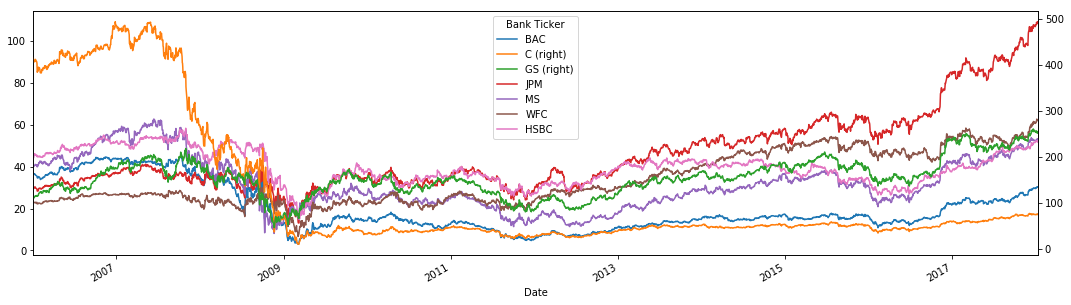

In [4]:
#plot stock prices
bank_stocks.xs(key='Adj Close',axis=1,level='Stock Info').plot(figsize=(18,5), secondary_y = ["C", "GS"])
plt.show()

We can clearly see in this stock price plot, the known crash of [Citigroup after 2008](https://en.wikipedia.org/wiki/Citigroup#Collapse_&_US_Government_Intervention_(2008). Also, interesting to note how the other major banks like Goldman Sachs, JPMorgan Chase, Wells Fargo etc. dips and bounches back after the recession quite quickly.

** Let us check the daily percentage change in each bank's stock price, defined as:**

$$r_t = \frac{p_t}{p_{t-1}} - 1$$

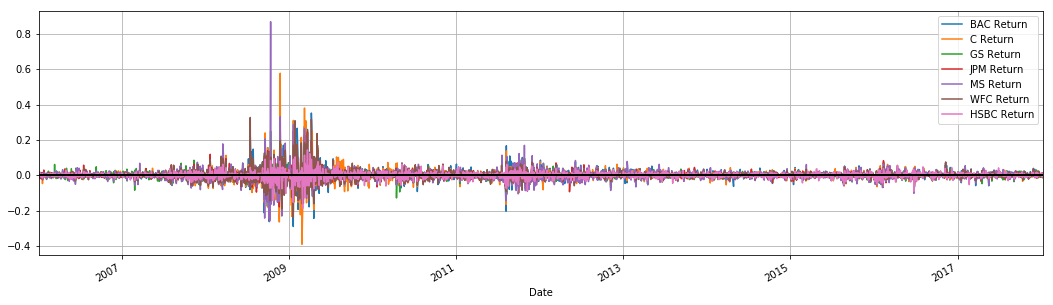

In [5]:
# daily returns
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Adj Close'].pct_change()
returns.head()

returns.plot(figsize=(18,5), label=tickers, grid = True).axhline(y = 0, color = "black", lw = 2)
plt.show()

## Volatility of a stock

It is measured as change in variance in the returns of a stock over a specific period of time. We can simply calculate it from the rolling window standard deviation on the percentage change in a stock. 

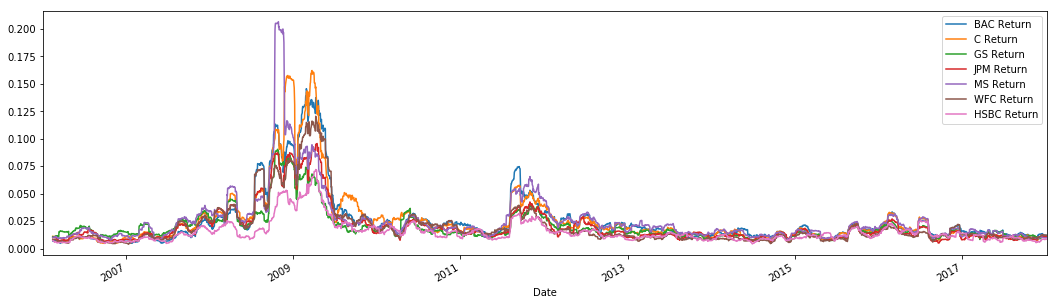

In [7]:
# Calculate the volatility for each month starting 2006
vol = returns.rolling(30).std() 
vol.plot(figsize=(18, 5))
plt.legend()
plt.show()

By comparing the volatility of a stock with another stock, we can easily get the feel of the risk. Generally, the higher the volatility, the riskier the investment in that stock is. In simple words, the basic measurement in the riskiness of a stock is the standard deviation of the returns of the stock. So, we see higher volatility during 2008-recession and around [Aug-2011](https://en.wikipedia.org/wiki/August_2011_stock_markets_fall), but after 2017, market seems quite stable!

We will talk about moving averages and trading strategies in next article.

** But please note that this article should be used for learning purposes only and is not a financial advice. **